## Darvas Box Theory
Darvas boxes are a fairly simple indicator created by drawing a line along lows and highs to make the box. We believe in a short period the stock price fluctuate within the box. Inside a box, when the current price hits the lower bound and the predicted future price has an increasing trend, the trading decision is BUY. Similarily, when the current price hits the upper bound and the prediction future price has a decreasing trend, the trading decision is SELL. Otherwise, HOLD.    
Problems need to be addressed:  
1. How to update the upper and lower bound of a box?     
average of lowest 3 and average of highest 3 price in the past n trading days since previous starting day(the first day od a box), where n needs to be tested on        

2. Determine a stop-loss order
$\sigma$: when the loss > sigma, SELL

In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import heapq

In [195]:
data_path  = "data/ucsbdata.csv"
raw_data = pd.read_csv(data_path)
# Select only data after the market crash 
data_start = '2008-12-01'
data = raw_data.loc[raw_data.Index > data_start]
# Convert string Index to datetime
index_datatime = pd.to_datetime(data['Index']).values
data['Index'] = index_datatime
# Replace current index with data index 
data.set_index('Index', inplace = True)
close=data[["CLOSE",'R']]
close.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,CLOSE,R
Index,,
2008-12-02,848.81,0.023014
2008-12-03,870.74,-0.022654
2008-12-04,845.22,0.023029
2008-12-05,876.07,0.023046
2008-12-08,909.70,-0.016621


In [196]:
#construct the strategy
#This strategy needs prediction from the date start trading till five days after the end date
delta=0.01
sigma=0.03
initial_start_trade='2015-12-01'
start=initial_start_trade
end='2016-12-01'
#date index
full_period=close.index[(close.index>=start)]
test_period=close.index[(close.index>=start)&(close.index<end)]
# To match the length
money=[10000]*(len(close.index[(close.index<end)])-len(test_period))
L=[close["CLOSE"][test_period[0]]]*(len(close.index[(close.index<end)])-len(test_period))
U=[close["CLOSE"][test_period[0]]]*(len(close.index[(close.index<end)])-len(test_period))
#buy on the first day
state="empty"
share=0

for i in range(len(test_period)):
    past_days=close["CLOSE"].loc[(close.index <= test_period[i]) & (close.index>=start)]
    up_bound=np.mean(heapq.nlargest(5,past_days.values))
    low_bound=np.mean(heapq.nsmallest(5,past_days.values))
    L.append(low_bound)
    U.append(up_bound)
    if(state=="full"):
        if(len(past_days)>5):
            if((close["CLOSE"][test_period[i]]>up_bound)&(np.mean(close["CLOSE"][test_period[i]:full_period[i+5]])<=up_bound)|(close["R"][test_period[i]]<= -sigma)):
                #sell
                state="empty"
                share=0
    elif(state=="empty"):
        if(len(past_days)>5):
            if((close["CLOSE"][test_period[i]]<low_bound)|(np.mean(close["CLOSE"][test_period[i]:full_period[i+5]])>=low_bound)):
                #buy
                share=money[-1]/(close["CLOSE"][test_period[i]])
                state="full"
    #start a new box
    if(state=="empty"):
        tdmoney=money[-1]
    elif(state=="full"):
        tdmoney=share*close["CLOSE"][test_period[i]]
    if(abs(close["R"][test_period[i]])>delta):
        start=test_period[i]
    money.append(tdmoney)
    print(share)
money=money+[money[-1]]*(len(close.index)-len(money))
L=L+[L[-1]]*(len(close.index)-len(L))
U=U+[U[-1]]*(len(close.index)-len(U))

close["money"]=money
close["upper"]=U
close["lower"]=L

0
0
0
0
0
0
0
4.872748181246742
4.872748181246742
4.872748181246742
4.872748181246742
4.872748181246742
4.872748181246742
4.872748181246742
4.872748181246742
4.872748181246742
4.872748181246742
4.872748181246742
4.872748181246742
4.872748181246742
4.872748181246742
4.872748181246742
4.872748181246742
4.872748181246742
4.872748181246742
4.872748181246742
4.872748181246742
4.872748181246742
4.872748181246742
4.872748181246742
4.872748181246742
4.872748181246742
4.872748181246742
4.872748181246742
4.872748181246742
4.872748181246742
4.872748181246742
4.872748181246742
4.872748181246742
4.872748181246742
4.872748181246742
4.872748181246742
4.872748181246742
4.872748181246742
4.872748181246742
4.872748181246742
4.872748181246742
4.872748181246742
4.872748181246742
4.872748181246742
4.872748181246742
4.872748181246742
4.872748181246742
4.872748181246742
4.872748181246742
4.872748181246742
4.872748181246742
4.872748181246742
4.872748181246742
4.872748181246742
4.872748181246742
4.872748181246

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [197]:
#The initial shares
init_share=10000/close["CLOSE"][initial_start_trade]
close["benchmark"]=close.apply(lambda x:init_share*x["CLOSE"], axis=1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


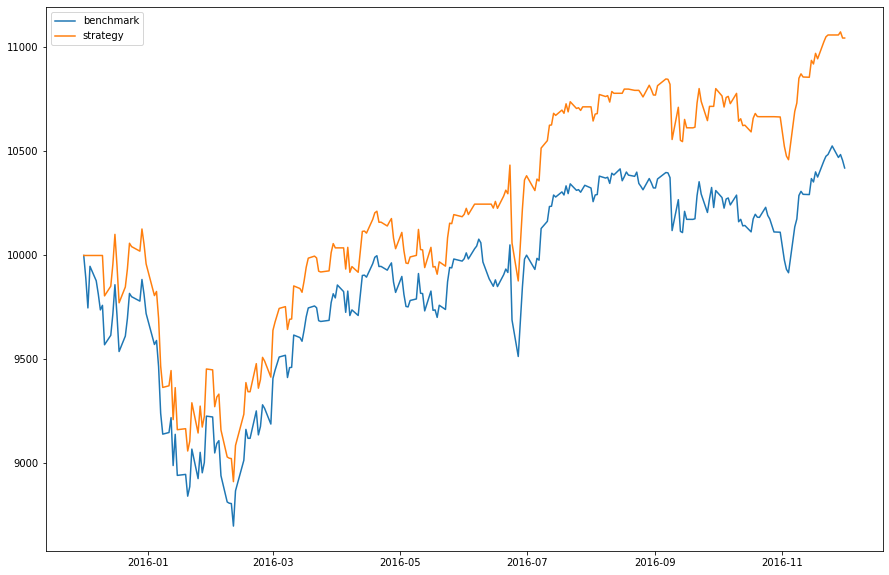

In [198]:
plt.figure(figsize=(15,10))
plt.plot(close["benchmark"][initial_start_trade:end],label="benchmark")
plt.plot(close["money"][initial_start_trade:end],label="strategy")
plt.legend()

In [199]:
close[initial_start_trade:end].head(10)

,CLOSE,R,money,upper,lower,benchmark
Index,,,,,,
2015-12-01,2102.63,-0.010265,10000.000000,2102.630000,2102.630000,10000.000000
2015-12-02,2079.51,-0.014110,10000.000000,2091.070000,2091.070000,9890.042471
2015-12-03,2049.62,0.019307,10000.000000,2064.565000,2064.565000,9747.887170
2015-12-04,2091.69,-0.006086,10000.000000,2070.655000,2070.655000,9947.969923
2015-12-07,2077.07,-0.006753,10000.000000,2072.793333,2072.793333,9878.437956
2015-12-08,2063.59,-0.007820,10000.000000,2070.492500,2070.492500,9814.327770
2015-12-09,2047.62,0.002569,10000.000000,2065.918000,2065.918000,9738.375273
2015-12-10,2052.23,-0.019580,10000.000000,2066.840000,2058.026000,9760.300195
2015-12-11,2012.37,0.005032,9805.772257,2032.300000,2032.300000,9570.728088


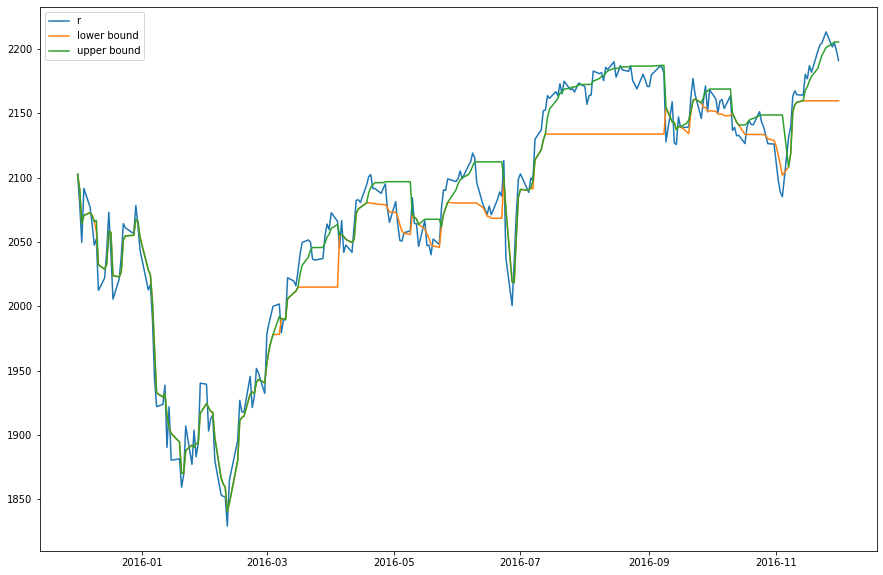

In [200]:
plt.figure(figsize=(15,10))
plt.plot(close["CLOSE"][initial_start_trade:end], label='r')
plt.plot(close["lower"][initial_start_trade:end],label="lower bound")
plt.plot(close["upper"][initial_start_trade:end],label="upper bound")
plt.legend()

In [8]:
np.mean(close["CLOSE"][test_period[5]:test_period[5+5]])

2744.67

In [9]:
len(close.index[(close.index>'2017-01-01')&(close.index<'2018-12-01')]),len(close.index[(close.index>'2016-12-01')&(close.index<'2018-12-01')])

(483, 503)